In [75]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv('wisc_bc_data.csv')
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.1242,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.1916,0.07926,0.2940,0.07587


In [77]:
df.shape

(569, 32)

In [78]:
df.drop('id',1,inplace = True)

In [79]:
df.isnull().sum().sum()

0

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis          569 non-null    object 
 1   radius_mean        569 non-null    float64
 2   texture_mean       569 non-null    float64
 3   perimeter_mean     569 non-null    float64
 4   area_mean          569 non-null    float64
 5   smoothness_mean    569 non-null    float64
 6   compactness_mean   569 non-null    float64
 7   concavity_mean     569 non-null    float64
 8   points_mean        569 non-null    float64
 9   symmetry_mean      569 non-null    float64
 10  dimension_mean     569 non-null    float64
 11  radius_se          569 non-null    float64
 12  texture_se         569 non-null    float64
 13  perimeter_se       569 non-null    float64
 14  area_se            569 non-null    float64
 15  smoothness_se      569 non-null    float64
 16  compactness_se     569 non

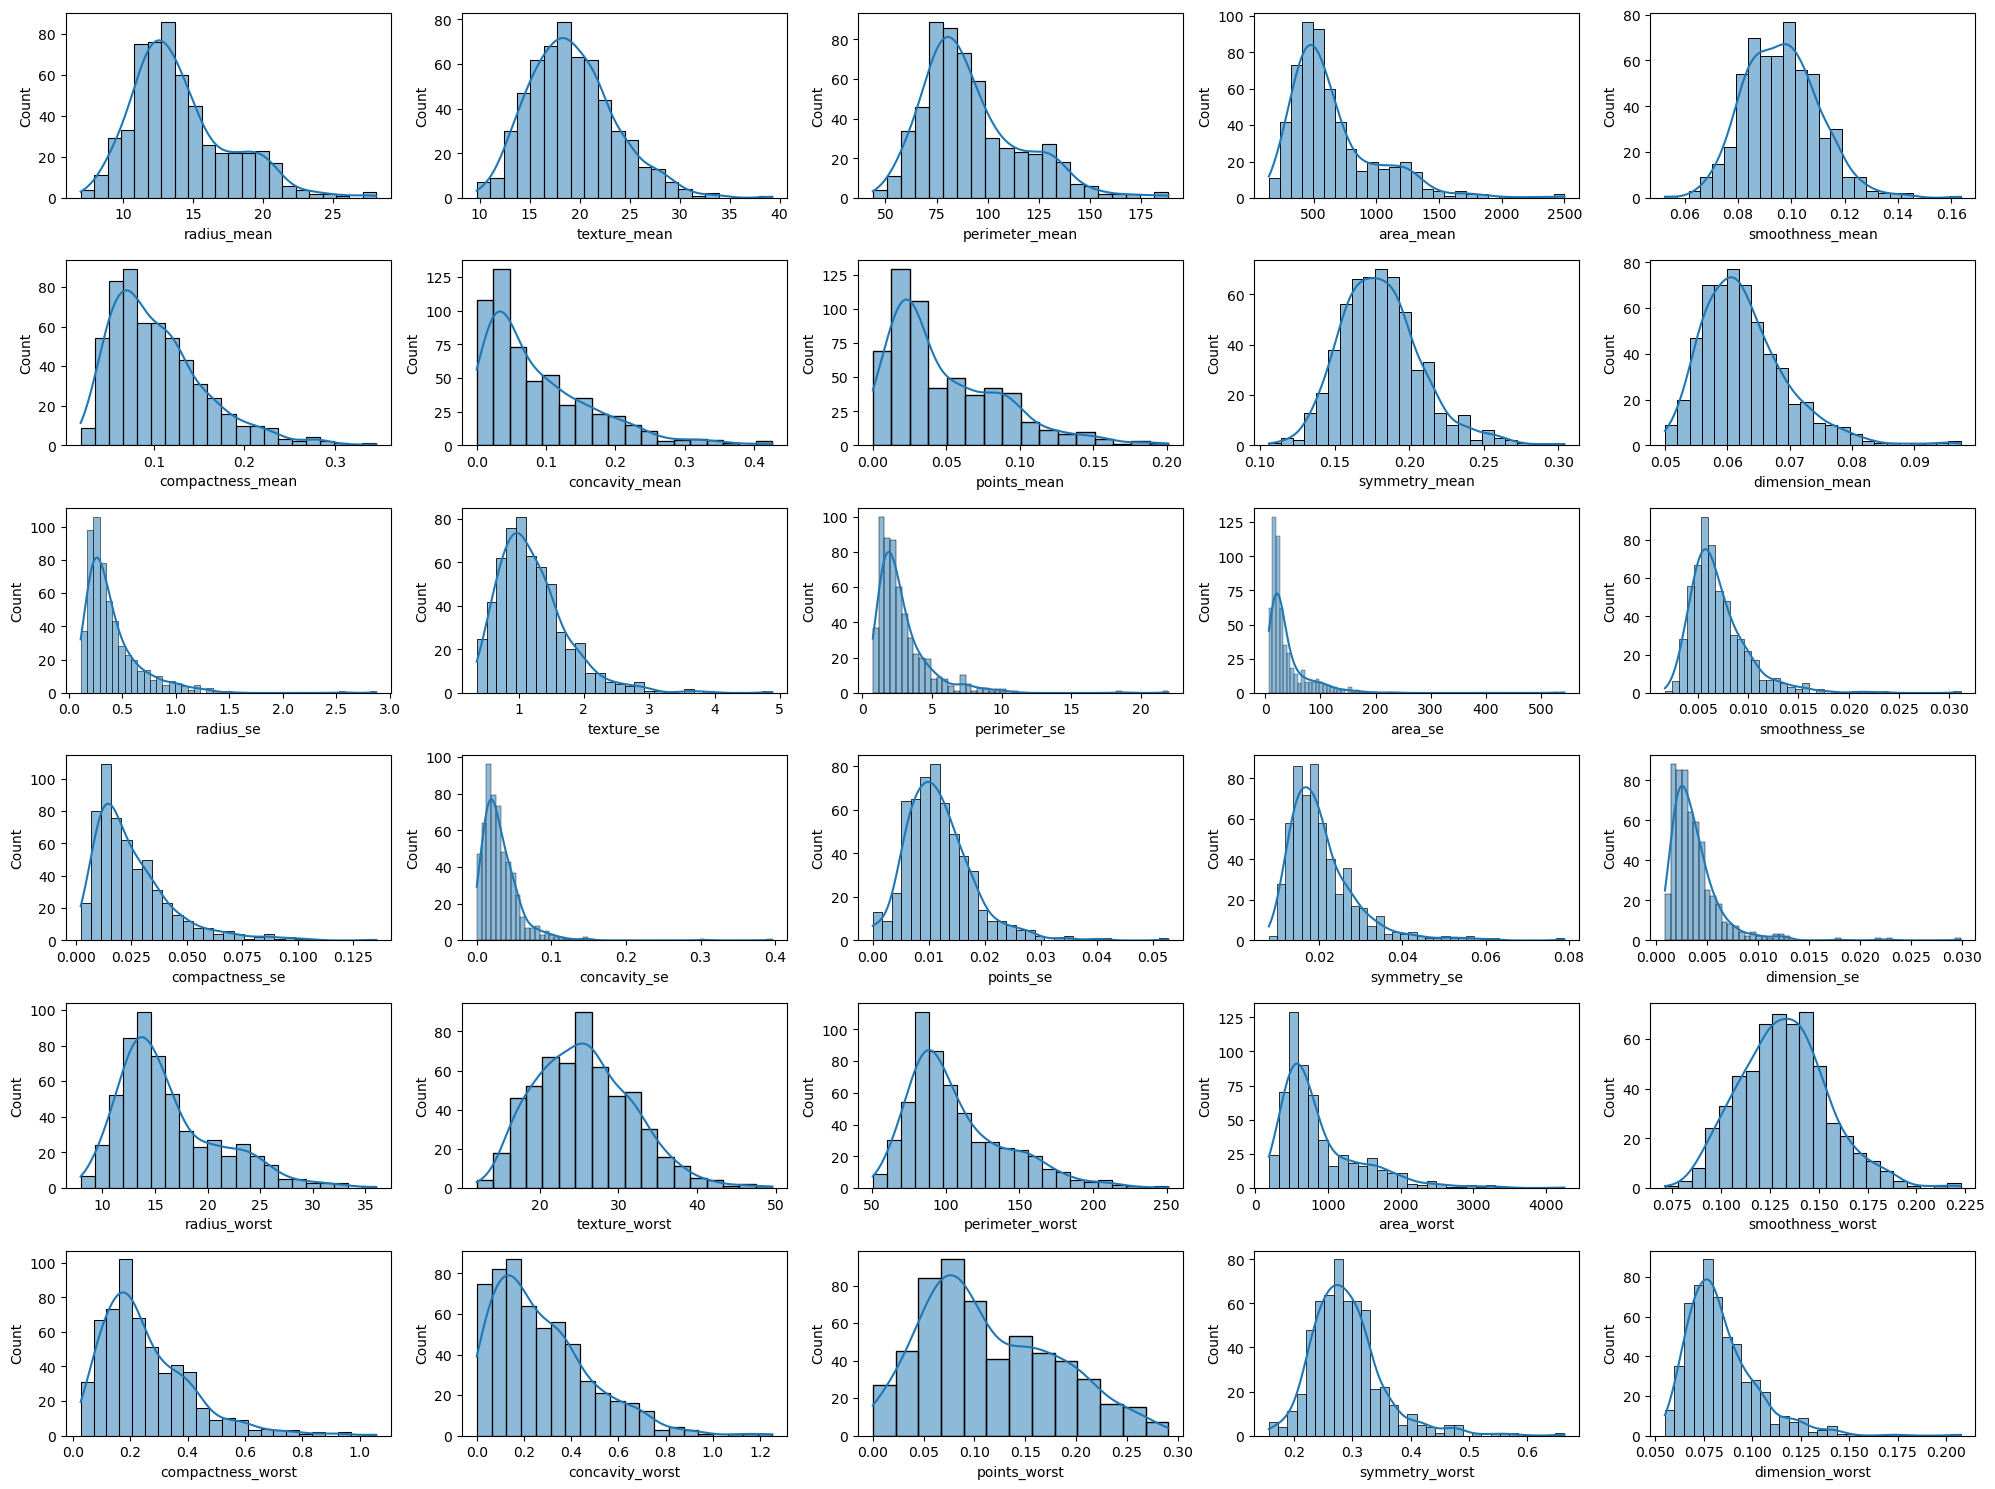

In [81]:
cols = df.columns

index_to_remove = np.where(cols == 'diagnosis')
cols = np.delete(cols, index_to_remove)

fig, ax= plt.subplots(6,5, figsize=(20,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.histplot(df[i], ax=subplot,kde=True)

plt.tight_layout()
plt.show()

<Figure size 20000x15000 with 0 Axes>

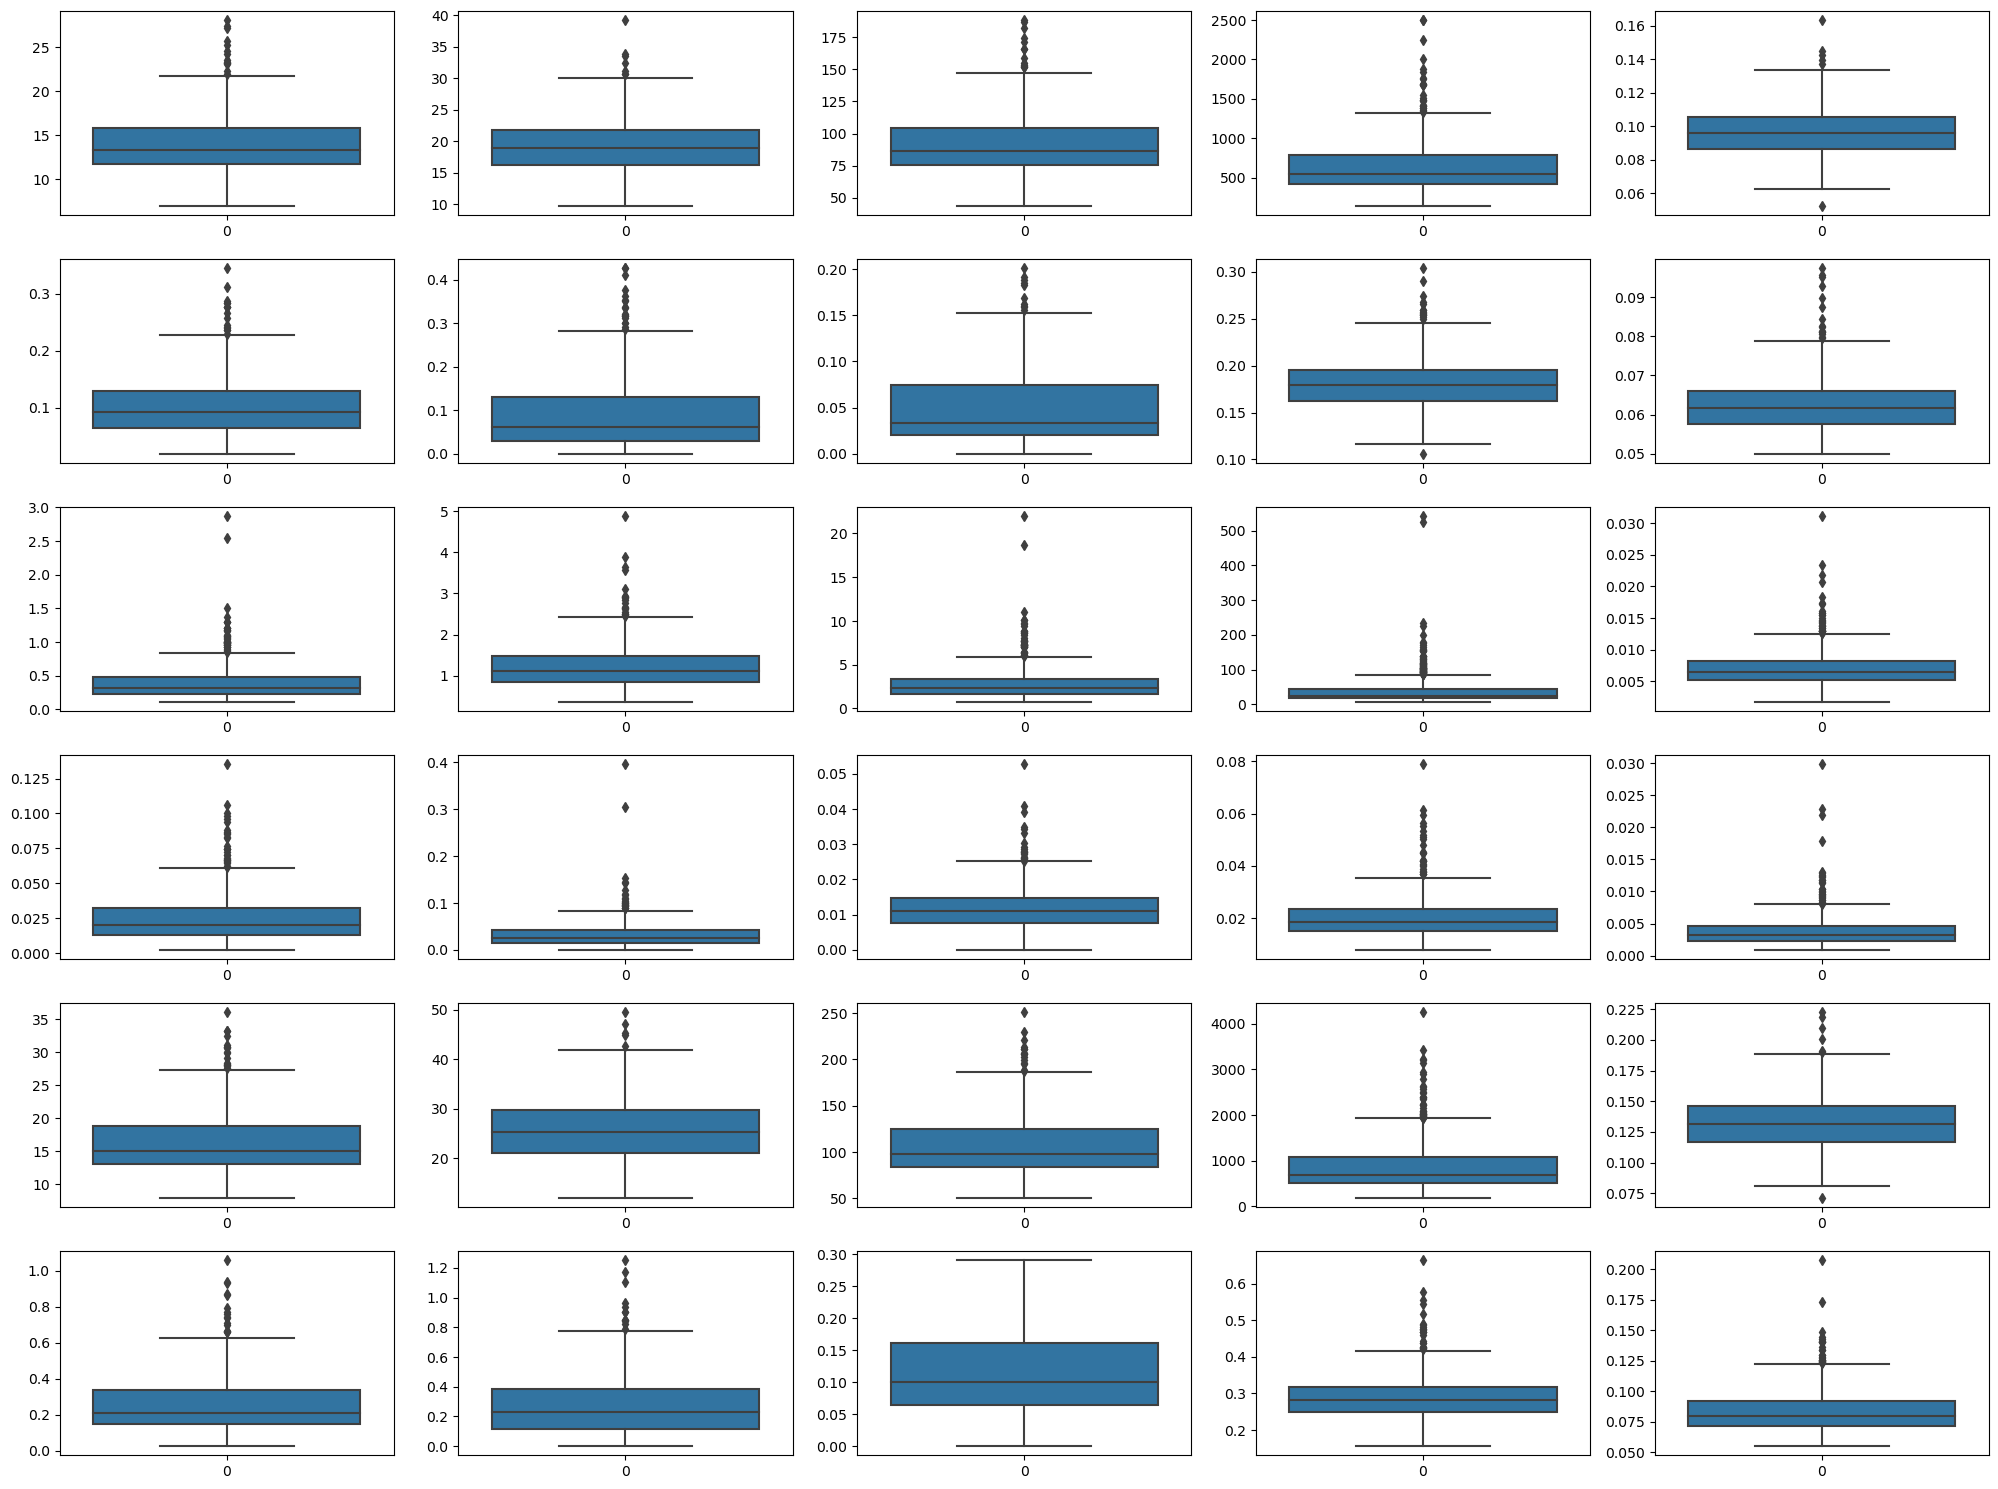

In [82]:
cols = df.columns
plt.figure(figsize=(200,150))
index_to_remove = np.where(cols == 'diagnosis')
cols = np.delete(cols, index_to_remove)

fig, ax= plt.subplots(6,5, figsize=(20,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(df[i], ax=subplot)

plt.tight_layout()
plt.show()

## Building Model Random Forest

In [114]:
from sklearn.model_selection import train_test_split

In [119]:
x = df.drop('diagnosis',1)
y = df['diagnosis']

In [120]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,random_state=1)

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [123]:
rf = RandomForestClassifier(random_state=1)

rf.fit(xtrain, ytrain)

ypred_rf = rf.predict(xtest)
print('accuracy_score  ',accuracy_score(ytest ,ypred_rf))

accuracy_score   0.9532163742690059


## K Means

In [136]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [137]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)
xtrain_sc,xtest_sc,ytrain,ytest = train_test_split(x_sc,y,train_size=0.7,random_state=1)

In [138]:
err = []
for i in range(1,11):
    model = KMeans(n_clusters = i , random_state = 1)
    model.fit(x_sc)
    err.append(model.inertia_)

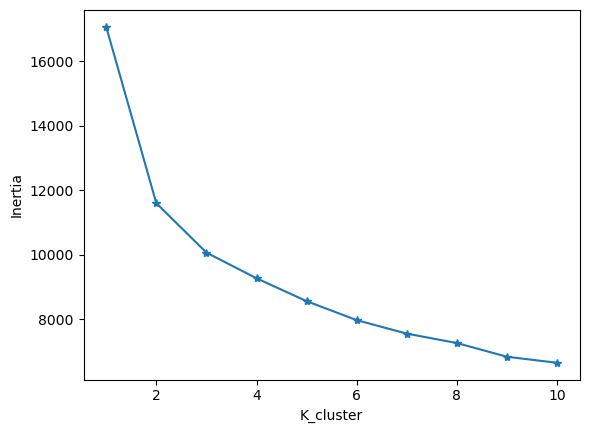

In [139]:
plt.plot(range(1,11),err,marker='*')
plt.xlabel('K_cluster')
plt.ylabel('Inertia')
plt.show()

In [140]:
err  #inertia

[17070.0,
 11595.461473962347,
 10061.797818243698,
 9264.404514688003,
 8554.02275978921,
 7965.603065974497,
 7546.293196921492,
 7255.447550889045,
 6828.378853308942,
 6642.127729069311]

In [141]:
from sklearn.metrics import silhouette_score

In [142]:
for i in range(2,11):
    model = KMeans(n_clusters = i , random_state = 100)
    model.fit(x_sc)
    s_score = round(silhouette_score(x_sc,model.labels_),2)
    print('silhouette_score for ',i,'cluster is',s_score)

silhouette_score for  2 cluster is 0.34
silhouette_score for  3 cluster is 0.31
silhouette_score for  4 cluster is 0.28
silhouette_score for  5 cluster is 0.16
silhouette_score for  6 cluster is 0.16
silhouette_score for  7 cluster is 0.16
silhouette_score for  8 cluster is 0.13
silhouette_score for  9 cluster is 0.15
silhouette_score for  10 cluster is 0.15


In [143]:
# silhotte score is numerical method, elbow plot is visualised method

Best number of cluster is 2

In [159]:
model = KMeans(n_clusters = 2 , random_state = 1)
model.fit(x_sc)

KMeans(n_clusters=2, random_state=1)

In [176]:
df['labels'] = model.labels_

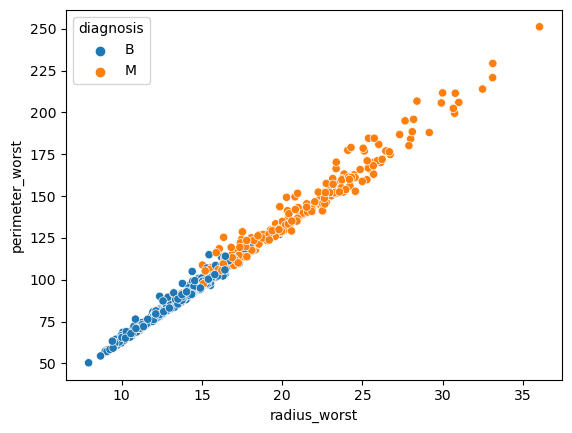

In [179]:
sns.scatterplot(x = df['radius_worst'],y = df['perimeter_worst'],hue = df['diagnosis'])
plt.show()

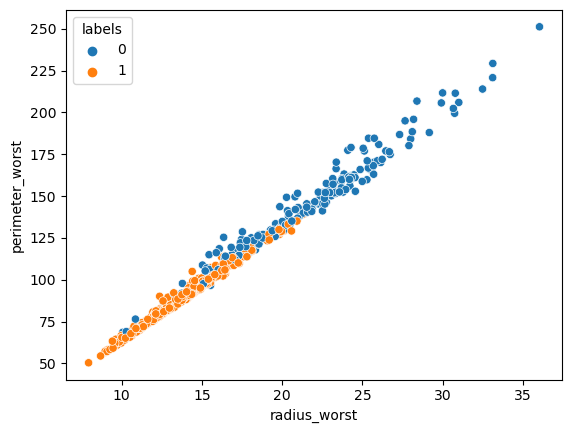

In [180]:
sns.scatterplot(x = df['radius_worst'],y = df['perimeter_worst'],hue = df['labels'])
plt.show()

In [181]:
# imp = pd.DataFrame(x.columns.to_list())

In [182]:
# imp['imppp'] = rf.feature_importances_

In [183]:
# imp.sort_values('imppp',ascending = False)

# PCA

In [185]:
c = np.cov(x_sc.T)

In [186]:
eigval, eigvect = np.linalg.eig(c)

In [187]:
eigval

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 1.33279057e-04,
       7.50121413e-04, 1.59213600e-03, 6.91261258e-03, 8.19203712e-03,
       1.55085271e-02, 1.80867940e-02, 2.43836914e-02, 2.74877113e-02,
       3.12142606e-02, 3.00256631e-02])

In [188]:
#eigval already sorted, genereally we need to sort

In [209]:
var_exp = eigval/sum(eigval) * 100
var_exp

array([4.42720256e+01, 1.89711820e+01, 9.39316326e+00, 6.60213492e+00,
       5.49576849e+00, 4.02452204e+00, 2.25073371e+00, 1.58872380e+00,
       1.38964937e+00, 1.16897819e+00, 9.79718988e-01, 8.70537901e-01,
       8.04524987e-01, 5.23365745e-01, 3.13783217e-01, 2.66209337e-01,
       1.97996793e-01, 1.75395945e-01, 1.64925306e-01, 4.43482743e-04,
       2.49601032e-03, 5.29779290e-03, 2.30015463e-02, 2.72587995e-02,
       5.16042379e-02, 6.01833567e-02, 8.11361259e-02, 9.14646751e-02,
       1.03864675e-01, 9.99096464e-02])

In [210]:
pc = x_sc.dot(eigvect)

In [211]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 44.27202561,  63.24320765,  72.63637091,  79.23850582,
        84.73427432,  88.75879636,  91.00953007,  92.59825387,
        93.98790324,  95.15688143,  96.13660042,  97.00713832,
        97.81166331,  98.33502905,  98.64881227,  98.91502161,
        99.1130184 ,  99.28841435,  99.45333965,  99.45378313,
        99.45627914,  99.46157694,  99.48457848,  99.51183728,
        99.56344152,  99.62362488,  99.704761  ,  99.79622568,
        99.90009035, 100.        ])

## Scree Plot

In [212]:
import matplotlib.pyplot as plt

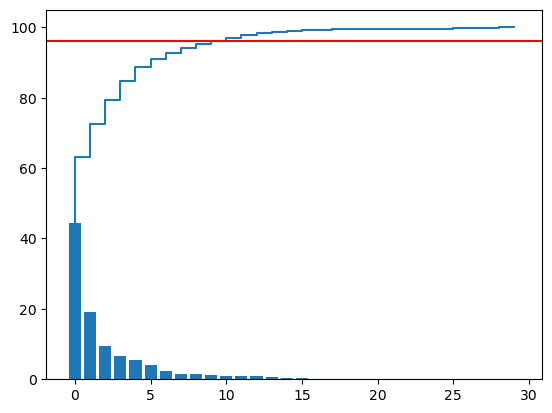

In [213]:
plt.bar(range(30), var_exp)
plt.step(range(30), cum_var_exp)
plt.axhline(96, c = 'red')
plt.show()

In [214]:
from sklearn.decomposition import PCA

In [215]:
# another way of creating PC
# earlier we did by pc = scaled.dot(eigvect)

# 10 featuers contributes about 95 %

my_pca = PCA(n_components=10)
pca2 = my_pca.fit_transform(x_sc)
pca_df = pd.DataFrame(pca2)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9
0,-2.514876,0.114252,-0.496623,2.354347,-0.689375,-0.044259,-1.048426,-0.026297,0.506177,0.335009
1,-1.464676,1.686632,1.169906,0.325662,-0.464873,1.248419,0.115766,0.144161,0.360972,-0.490690
2,-2.926374,0.377332,-0.886794,-0.115345,-0.985680,-0.334456,-0.018665,-0.897150,0.189684,-0.399419
3,-1.992035,1.329355,1.135245,2.046433,-0.252128,-1.757083,-1.395872,-0.618485,0.194029,0.078401
4,-2.499636,-2.018536,-0.731275,1.985023,1.135956,0.617819,-0.479727,0.220874,-0.323707,0.372078


### Now we need to build model using these 2 feautres

In [216]:
my_pca.explained_variance_
# this is eigenvalue

array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752,  1.65163324,
        1.20948224,  0.67640888,  0.47745625,  0.41762878,  0.35131087])

In [217]:
my_pca.explained_variance_ratio_
#percentage

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

# LDA (Linear Discrimination Analysis)

In [218]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [219]:
mylda = LDA()
lda_model = mylda.fit(x_sc, y)

In [220]:
lda_model.explained_variance_ratio_
# eigen value percentage

array([1.])

In [123]:
# now passing ncomponent = 1

In [222]:
mylda = LDA(n_components=1)
lda_model = mylda.fit(x_sc, y)
lda_model.explained_variance_ratio_

array([1.])

### Train test split

In [223]:
from sklearn.model_selection import train_test_split

In [225]:
xtrain,xtest, ytrain,ytest = train_test_split(x_sc,y, test_size=0.7, random_state=87)

In [226]:
mylda = LDA()
lda_model = mylda.fit(x_sc, y)
lda_model.explained_variance_ratio_

array([1.])

In [227]:
ypred = lda_model.predict(xtest)

In [228]:
from sklearn.metrics import accuracy_score

In [229]:
accuracy_score(ypred, ytest)

0.974937343358396

In [230]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst,labels
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771,1
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587,1
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881,1
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784,1
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,...,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925,1
565,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,...,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488,1
566,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,...,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772,1
567,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,...,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810,1
